# Analysis Notebook for Non-Dl Models

In the following we will provide a quantitative and qualitative Analysis of the non deep learning models we trained.

### Quanitative Analysis
In the Quantitative Analysis we calculated several standard evaluation metrics to provide an overview of the classifier's performance.
1. Overall Performance Metrics

    We looked at the accuracy, precision, recall and the f1-score
    Sinze the Dataset, including the Testdataset is very imbalaced we used weighted metrics

2. Confusion Matrix

    The confusion Matrix visualizes the model's predictions vs. true labels. This helps us to get an overview of in-/correctly classified sexist content as well as missed sexist content and correctly identified non-sexist content.

3. Precision-Recall Curve

    We had a look at the Tradeoff between Precision and Recall. And checked the models performance at different classification thresholds

4. ROC-Curve 

    The ROC-Curve is another method to check the model's ability to distinguidh between classes, which we used.

5. Prediction Probability Distribution

    We also had a look at the models confidence and visualized how prediction probabilities are distributed to reveal potential biases or classification challenges.

### Qualitative Analysis

1. Misclassification Analysis
    - we examined False Positives and False Negatives
    - we tried to understand where and why the model makes mistakes
2. Text Pattern Analysis
    - we extracted features like text length, word counts, Uppercase ratio, precent of explicit language
    - compared features across different true labels
    - we tried to identify potential patterns that might influence the classification
3. Challenging Examples Identification
    - we looked for samples with low classification confidence 
    - we tried to find the limitations of the model


### Key Observations of Logistic Regression Model

- It leans toward predicting class 0, likely due to class imbalance.
- When the model predicts "Sexist," it is very confident in some cases.

In [61]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import re

In [75]:
# Load CSV file into a pandas DataFrame.
data = pd.read_csv('../output/logisticRegression_test_predictions.csv')
#data = pd.read_csv('../output/logisticRegression_test_predictions_optimized.csv')

#### Jusitfication for using one logistic model over the other
We are loading two different models here. This is the reason because we wanted to check which model is better suited for the task. 

The output of the first  model  is in the csv-file called "logisticRegression_test_predictions.csv" The model was trained using a normal f1-score and not using 'balanced' weights to train the model.

The output of the second model is in the csv-file 'logisticRegression_test_predictions_optimized.csv' here we used "f1_weighted" and custom weights to work against the imbalance of the dataset. 

We compared the models using standard metrices and the confusion matrix. 
In the confusion matrix is very good visible that the models focus on different classes and outputs. 

We decided to continue the deeper analysis with the first model since it better detects sexist content. (It has a higher True Positive Score)A higher Recall value is more important for us than a higher precision score, because identifiying all sexist content is the priority.

### Quantitative Analysis

1. Overall Performance Metrics

In [76]:
true_labels = data['true_label']
predicted_labels = data['predicted_label']

# Compute metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)

# Print metrics
print("Accuracy:", accuracy)
print("Precision_weighted:", precision)
print("Recall_weighted:", recall)
print("F1 Score_weighted:", f1)
print("\nClassification Report:\n", classification_report(true_labels, predicted_labels))

print("Accuracy:", accuracy)
print("Precision:", precision_score(true_labels, predicted_labels, zero_division=0))
print("Recall:", recall_score(true_labels, predicted_labels, zero_division=0))
print("F1 Score:", f1_score(true_labels, predicted_labels,  zero_division=0))

Accuracy: 0.80075
Precision_weighted: 0.8157926101498487
Recall_weighted: 0.80075
F1 Score_weighted: 0.8063869759241254

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      3030
           1       0.57      0.69      0.63       970

    accuracy                           0.80      4000
   macro avg       0.73      0.76      0.74      4000
weighted avg       0.82      0.80      0.81      4000

Accuracy: 0.80075
Precision: 0.5746333045729077
Recall: 0.6865979381443299
F1 Score: 0.6256458431188351


2. Confusion Matrix

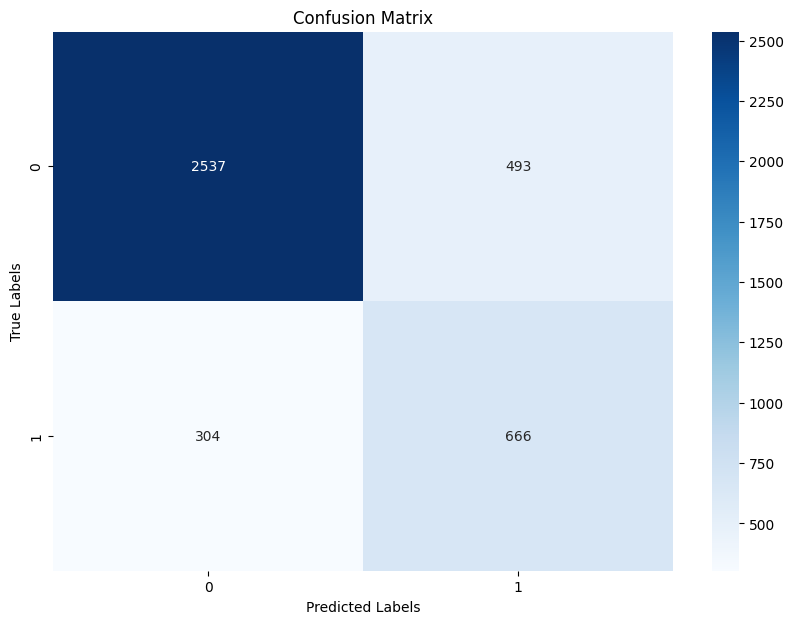

In [77]:

cm = confusion_matrix(true_labels, predicted_labels)
class_names = sorted(data['true_label'].unique())
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

3. Precision Recall Curve


3. Precision-Recall Curve


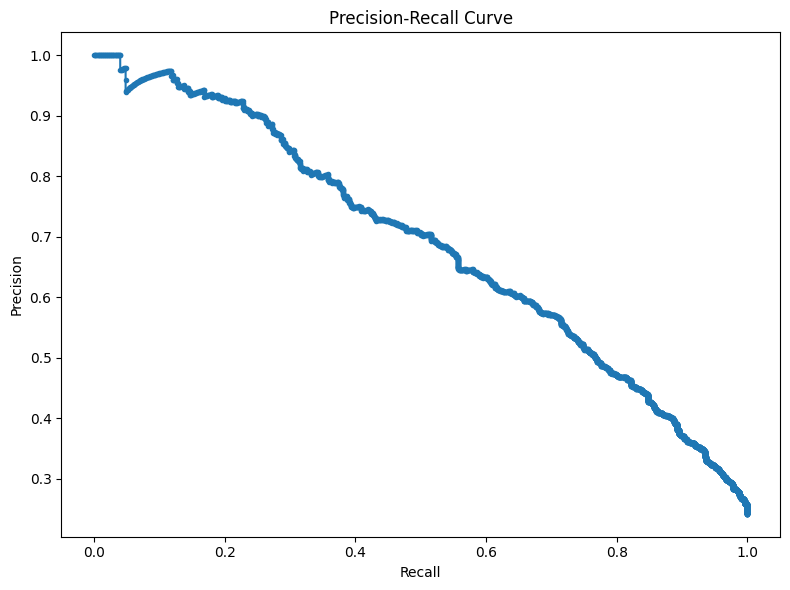

In [78]:

print("\n3. Precision-Recall Curve")
precision, recall, thresholds = precision_recall_curve(
    data['true_label'], 
    data['prediction_probability']
)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.tight_layout()
plt.show()

4. ROC-Curve

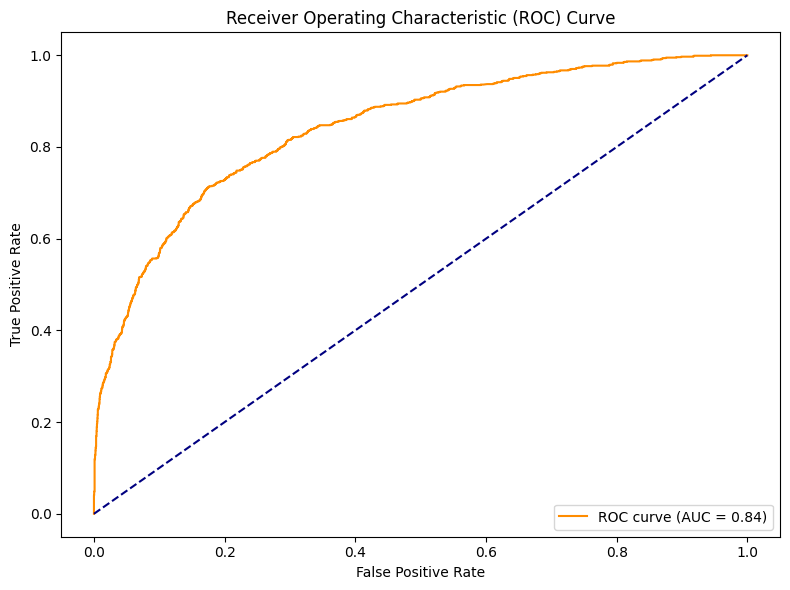

In [79]:

fpr, tpr, roc_thresholds = roc_curve(
    data['true_label'], 
    data['prediction_probability']
)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

5. Prediction Probability Distribution

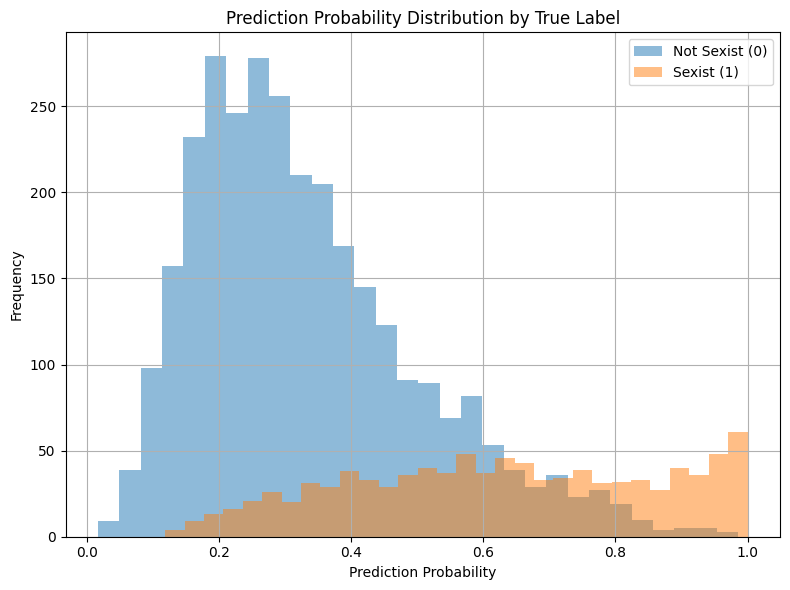

In [80]:
plt.figure(figsize=(8,6))
data.groupby('true_label')['prediction_probability'].hist(
    alpha=0.5, 
    bins=30
)
plt.title('Prediction Probability Distribution by True Label')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.legend(['Not Sexist (0)', 'Sexist (1)'])
plt.tight_layout()
plt.show()

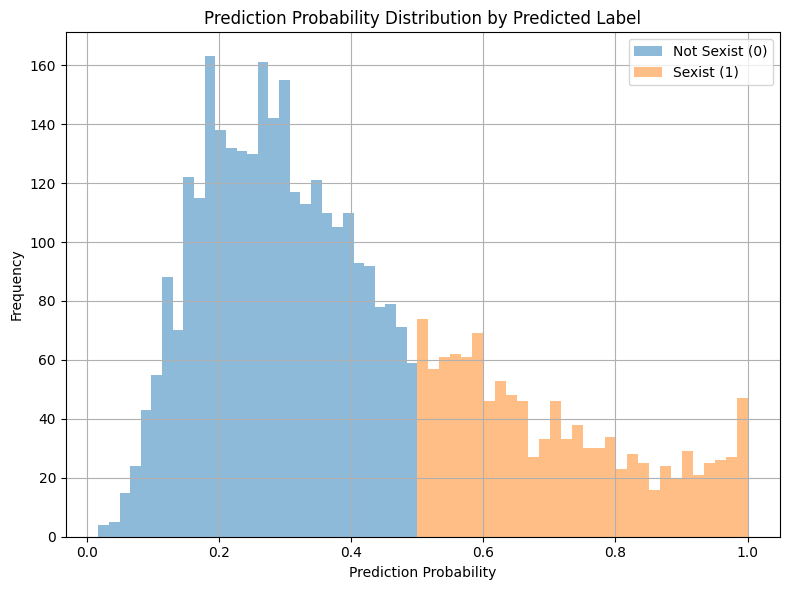

In [81]:
plt.figure(figsize=(8,6))
data.groupby('predicted_label')['prediction_probability'].hist(
    alpha=0.5, 
    bins=30
)
plt.title('Prediction Probability Distribution by Predicted Label')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.legend(['Not Sexist (0)', 'Sexist (1)'])
plt.tight_layout()
plt.show()

##### Key Observations:
- Most of the predictions for class 0 cluster on the left side (probabilities between 0.1 and 0.4).
- This indicates that the model predicts "Not Sexist" with relatively low to moderate confidence. It rarely assigns probabilities close to 0.0 or 1.0 for class 0.
- This can suggest that the model is less certain about predictions for class 0 but as the dataset is imbalanced towards class 0, it still labels the data to class 0 although it is unsure

- Predictions for class 1 are spread more evenly across the probability range, but there’s a concentration around 0.5 to 1.0.
- A noticeable peak near 0.9 to 1.0 suggests that when the model predicts "Sexist", it does so with high confidence in some cases.
- However, there are also class 1 examples predicted with lower probabilities (e.g., between 0.2 and 0.6). This reflects uncertainty or overlap between the two classes.


- -> It leans toward predicting class 0, likely due to class imbalance.
- -> For class 1, the peak near 0.9–1.0 indicates that when the model predicts "Sexist," it is very confident in some cases.



### Qualitative Analysis

1. Misclassification Analysis

In [28]:

misclassified = data[data['true_label'] != data['predicted_label']]
print(f"Total Misclassified Samples: {len(misclassified)}")

# False Positives (Predicted Sexist but Actually Not)
false_positives = misclassified[misclassified['predicted_label'] == 1]
print(f"\nFalse Positives: {len(false_positives)}")
print("\nSample False Positive Texts:")
print(false_positives['text'].sample(min(5, len(false_positives))).to_string())

# False Negatives (Predicted Not Sexist but Actually Sexist)
false_negatives = misclassified[misclassified['predicted_label'] == 0]
print(f"\nFalse Negatives: {len(false_negatives)}")
print("\nSample False Negative Texts:")
print(false_negatives['text'].sample(min(5, len(false_negatives))).to_string())
    

Total Misclassified Samples: 638

False Positives: 90

Sample False Positive Texts:
3587    i see it differently with hypergamy dialed up ...
281     some people should never be bald forceps are a...
366     i didnt imply that everyone man who doesnt ide...
2884    if there are men and women and all of the wome...
2615    not all women date up there are plenty of wome...

False Negatives: 548

Sample False Negative Texts:
2656    forgot about the part where it says gives wome...
3244    how about the unworthy nonvictims of nonrape h...
3807    yep a beta nobucks cuck like who cares what wo...
1995    u must have quite the gift of gab to do pp wit...
346     i am so sick of this pay gap bullshit what abo...


2. Text Pattern Analysis

In [31]:

def extract_features(text):
    """Extract basic text features for analysis"""
    return {
        'length': len(text),
        'word_count': len(text.split()),
        'uppercase_ratio': sum(1 for c in text if c.isupper()) / len(text),
        'contains_explicit': bool(re.search(r'\b(explicit|offensive)\b', text.lower())),
        'contains_profanity': bool(re.search(r'\b(fuck|shit|damn)\b', text.lower()))
    }
    
# Apply feature extraction
data['features'] = data['text'].apply(extract_features)

# Analyze features by classification
feature_analysis = data.groupby('true_label')['features'].apply(
    lambda x: pd.DataFrame(x.tolist()).mean()
)
print("\nFeature Analysis by True Label:")
print(feature_analysis)
    


Feature Analysis by True Label:
true_label                    
0           length                116.746865
            word_count             22.202970
            uppercase_ratio         0.000000
            contains_explicit       0.000000
            contains_profanity      0.089439
1           length                128.842268
            word_count             24.452577
            uppercase_ratio         0.000000
            contains_explicit       0.000000
            contains_profanity      0.109278
Name: features, dtype: float64


3. Challenging Examples Identification

In [33]:

# Samples with low confidence
low_confidence = data[
    (data['true_label'] != data['predicted_label']) & 
    (abs(data['prediction_probability'] - 0.5) < 0.2)
]
print(f"\nLow Confidence Misclassifications: {len(low_confidence)}")
print("\nSample Low Confidence Misclassified Texts:")
print(low_confidence['text'].sample(min(5, len(low_confidence))).to_string())



Low Confidence Misclassifications: 225

Sample Low Confidence Misclassified Texts:
1018    dont hate women i just understand the price th...
2975    if you were chad shed be on your cock right no...
1019    i for one am glad chad is fucking women who ar...
3473    not my point my point is the average woman put...
3217    thats because black women are more overweight ...


In [9]:
# Filter misclassified examples
misclassified = data[data['true_label'] != data['predicted_label']]
print(f"Number of misclassified examples: {len(misclassified)}\n")

# Display examples with the highest uncertainty
uncertain = misclassified.sort_values(by='prediction_probability', ascending=True).head(10)
print("Most uncertain predictions:")
print(uncertain[['rewire_id', 'text', 'true_label', 'predicted_label', 'prediction_probability']])
print()

# Display examples with high-confidence incorrect predictions
confident_wrong = misclassified.sort_values(by='prediction_probability', ascending=False).head(10)
print("High-confidence incorrect predictions:")
print(confident_wrong[['rewire_id', 'text', 'true_label', 'predicted_label', 'prediction_probability']])
print()

Number of misclassified examples: 638

Most uncertain predictions:
                     rewire_id  \
1610  sexism2022_english-10386   
1639   sexism2022_english-8218   
3160   sexism2022_english-4119   
1886  sexism2022_english-13064   
2241   sexism2022_english-7026   
3835   sexism2022_english-5965   
1120  sexism2022_english-12565   
3856  sexism2022_english-15081   
3232   sexism2022_english-6198   
3793  sexism2022_english-15918   

                                                   text  true_label  \
1610  ['calling' 'disgusting' 'im' 'like' 'murder' '...           1   
1639  ['attack' 'false' 'flag' 'sources' 'southern' ...           1   
3160  ['agree' 'breeding' 'definitely' 'dont' 'girl'...           1   
1886      ['asylum' 'authorities' 'camp' 'greek' 'url']           1   
2241  ['discrimination' 'especially' 'failure' 'mino...           1   
3835  ['board' 'bodies' 'flat' 'girls' 'got' 'high' ...           1   
1120  ['absolutely' 'best' 'child' 'feed' 'gets' 'pr...      

In [10]:
#Analyze patterns in the text for misclassified examples.
print("Common textual patterns in misclassified examples:")

misclassified_texts = data['text']
# Example: Find average text length for misclassified examples
avg_length = misclassified_texts.apply(len).mean()
print(f"Average text length: {avg_length:.2f} characters\n")

# Example: Display a few misclassified texts
print("Sample misclassified texts:")
print(misclassified_texts.head(5))
print()

Common textual patterns in misclassified examples:
Average text length: 74.01 characters

Sample misclassified texts:
0    ['eat' 'eating' 'fuck' 'history' 'jews' 'nigge...
1    ['acts' 'ass' 'based' 'bullshit' 'good' 'knock...
2    ['arranged' 'daughter' 'evil' 'islam' 'marriag...
3    ['bad' 'dominated' 'female' 'generally' 'hyper...
4    ['bitch' 'boyfriend' 'didnt' 'face' 'literally...
Name: text, dtype: object

